## Experimentos com dataset benchmark transformado em espectrograma

In [2]:
import numpy as np
import scipy.io
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd

In [93]:
# Parâmetros da filtragem
fs = 250  # Frequência de amostragem (Hz)
freq_corte_low = 6  # Frequência de corte inferior (Hz)
freq_corte_high = 52  # Frequência de corte superior (Hz)
ordem_filtro = 10  # Ordem do filtro

# Carrega o arquivo que contém informações das frequências e fases associadas aos estímulos visuais.
frequencias_fases = scipy.io.loadmat("Freq_Phase.mat")
frequencias = np.round(
    frequencias_fases["freqs"], 2
)  # Frequências de estimulação, arredondadas
fases = frequencias_fases["phases"]  # Fases associadas às frequências


# Frequencias de interesse
freq_selecionadas = np.array([8, 10, 12, 15])  # Frequências de interesse

In [739]:
channels_loc = pd.read_csv("64-channels.loc", sep="\t", header=None)
channels = channels_loc.iloc[:, 3].to_numpy().astype(str)
channels = np.char.strip(channels)

In [95]:
frequencias

array([[ 8. ,  9. , 10. , 11. , 12. , 13. , 14. , 15. ,  8.2,  9.2, 10.2,
        11.2, 12.2, 13.2, 14.2, 15.2,  8.4,  9.4, 10.4, 11.4, 12.4, 13.4,
        14.4, 15.4,  8.6,  9.6, 10.6, 11.6, 12.6, 13.6, 14.6, 15.6,  8.8,
         9.8, 10.8, 11.8, 12.8, 13.8, 14.8, 15.8]])

In [96]:
channels

array(['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ',
       'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2',
       'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4',
       'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4',
       'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6',
       'P8', 'PO7', 'PO5', 'PO3', 'POz', 'PO4', 'PO6', 'PO8', 'CB1', 'O1',
       'Oz', 'O2', 'CB2'], dtype='<U8')

## STFT e Espectrograma

In [523]:
from scipy.signal import ShortTimeFFT
from sklearn.preprocessing import MinMaxScaler

In [160]:
# Carregaento dos dados já processados
windows = np.load("S1passa-banda_6_52_Hz_janelas.npy")
windows.shape

(64, 250, 40, 6, 5)

In [395]:
### 1 eletrodo apenas
eletrodo_Oz = 61  # Índice do eletrodo Oz
test_signal_10hz_3 = windows[
    [60, 61, 62], :, np.where(frequencias == freq_selecionadas[3])[1], 0, 0
]
test_signal_10hz_3.shape
test_signal_10hz_Oz = windows[
    61, :, np.where(frequencias == freq_selecionadas[3])[1], 0, 0
]

In [396]:
stft_window_length = 0.5
stft_window = np.ones([int(stft_window_length * fs)])
stft_window.shape

(125,)

In [473]:
SFT = ShortTimeFFT(stft_window, hop=int(fs * 0.25), fs=fs, scale_to=None)


Sx = SFT.stft(test_signal_10hz_Oz)
Sx3 = SFT.stft(test_signal_10hz_3)

In [402]:
Sx3.shape

(3, 63, 7)

In [392]:
SFT.f

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
       110., 112., 114., 116., 118., 120., 122., 124.])

In [375]:
SFT.delta_f

2.0

In [474]:
indices = np.where((SFT.f >= 7) & (SFT.f <= 16))
indices[0]

array([4, 5, 6, 7, 8], dtype=int64)

In [475]:
selected_freqs = SFT.f[indices]
selected_freqs.size

5

In [481]:
spec = Sx[:, indices[0], :]
spec

array([[[  -3.33115384  -0.33601686j,  -54.25286033 +65.95763917j,
          -21.6394744  +28.96635616j,   20.65255726 -39.93462943j,
          -47.97011469 -71.81388784j,  -62.05022132 -69.75513628j,
           -5.49077324  +1.03936702j],
        [   3.32165769  +0.41962295j,  150.32355835 -14.05133548j,
         -165.37536729-100.56990873j,   79.4408737  +74.35748755j,
         -162.02696041 +45.91229334j,  135.99019463  -3.56416662j,
            5.42102202  -1.29114308j],
        [  -3.31006351  -0.50296401j,  -79.0209224 -176.21787458j,
         -332.01925876-170.45973436j, -283.37408193 -23.89002393j,
         -184.76422449 +65.29163482j, -109.93045454+125.22584263j,
           -5.33648836  +1.53760651j],
        [   3.29637863  +0.58598738j, -106.74480981 +49.91974206j,
           91.65479369+108.39590132j,  -55.93385344-167.21165233j,
           50.01124352+123.5537703j ,  -35.21762872-133.67805361j,
            5.23759668  -1.77775883j],
        [  -3.28061168  -0.66864062j,  -

In [482]:
spec_db = 20 * np.log10(np.abs(spec))
spec_mag = spec_db / spec_db.max()
spec_mag[0]

array([[0.20404359, 0.75097302, 0.60583652, 0.64262756, 0.75285696,
        0.76601304, 0.29054755],
       [0.20404359, 0.84717949, 0.8891268 , 0.79187458, 0.86562537,
        0.82958228, 0.29007488],
       [0.20404359, 0.88875125, 1.        , 0.9540946 , 0.89121357,
        0.86383689, 0.28949602],
       [0.20404359, 0.80533572, 0.83676891, 0.87337837, 0.82613985,
        0.83229415, 0.28881027],
       [0.20404359, 0.55364594, 0.2452618 , 0.30614586, 0.73647641,
        0.70479651, 0.28801678]])

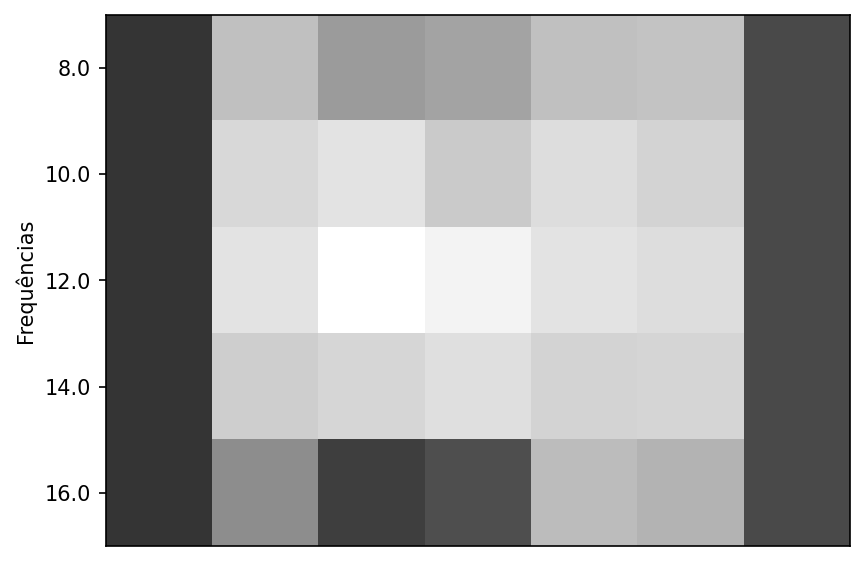

In [483]:
plt.figure(dpi=150)
plt.imshow(spec_mag[0] * 255, interpolation="nearest", cmap="gray", vmin=0, vmax=255)
plt.ylabel("Frequências")
plt.yticks(np.arange(selected_freqs.size), [str(freq) for freq in selected_freqs])
plt.xticks([])
plt.show()

In [76]:
spec_mag

array([[0.37568978, 0.70746124, 0.33614746],
       [0.05284541, 0.49885539, 0.4798494 ],
       [0.38258711, 0.60886494, 0.49047024],
       [0.1951721 , 0.30690631, 0.49213885],
       [0.74793788, 0.60193721, 0.25831866],
       [1.        , 0.76356316, 0.24985585],
       [0.42397101, 0.79679549, 0.45857008],
       [0.54375152, 0.67513525, 0.14737289],
       [0.39659698, 0.59312708, 0.2820878 ],
       [0.35262073, 0.80655875, 0.45761963]])

In [733]:
# Frequencias de interesse
freq_selecionadas = np.array([8, 10, 12, 15])  # Frequências de interesse


def create_spectrogram(signal, window_length, offset, fs, min_freq, max_freq):
    # Cria janela deslizante
    stft_window = np.ones([int(window_length * fs)])
    # Define a STFT
    SFT = ShortTimeFFT(stft_window, hop=int(fs * offset), fs=fs, scale_to=None)
    if SFT.delta_f > 2:
        print(
            "Resolução em frequência muito pequena para distinguir as freqs de interesse!"
        )
    # Aplica STFT
    Sx = SFT.stft(signal)

    # Seleciona apenas as frequencias de interesse (localizadas entre min_freq e max_freq)
    freq_indices = np.where((SFT.f >= min_freq) & (SFT.f <= max_freq))[0]
    selected_freqs = SFT.f[freq_indices]
    spec = Sx[:, freq_indices, :]

    # Interpola na frequencia para aumentar a imagem e dar espaço aos filtros
    rows = spec.shape[1]
    indices = np.arange(rows).repeat(2)
    interpolated_spec = spec[:, indices, :]

    final_spec = np.zeros(spec.shape)
    # Para cada eletrodo calcula a magnitude da stft em db
    # e aplica uma escala para deixar tudo entre 0 e 1
    for channel in range(spec.shape[0]):
        spec_db = 20 * np.log10(np.abs(spec[channel]))
        scaler = MinMaxScaler(feature_range=(0, 1))
        normalized_data = scaler.fit_transform(spec_db)  # normaliza entre 0 e 1
        final_spec[channel] = normalized_data
    return final_spec, selected_freqs


def show_spec(spec, selected_freqs):
    plt.figure(dpi=150)
    plt.imshow(spec, interpolation="nearest", cmap="gray", vmin=0, vmax=1)
    plt.ylabel("Frequências")
    plt.yticks(
        np.arange(selected_freqs.size) * 1, [str(freq) for freq in selected_freqs]
    )
    plt.xticks([])
    plt.show()

### Teste com Eletrodo pOz, Oz, O1 e O2

In [731]:
# Parâmetros da filtragem
fs = 250  # Frequência de amostragem (Hz)

# Carrega o arquivo que contém informações das frequências e fases associadas aos estímulos visuais.
frequencias_fases = scipy.io.loadmat("Freq_Phase.mat")
frequencias = np.round(
    frequencias_fases["freqs"], 2
)  # Frequências de estimulação, arredondadas
fases = frequencias_fases["phases"]  # Fases associadas às frequências

# Frequencias de interesse
freq_selecionadas = np.array([8, 10, 12, 15])  # Frequências de interesse
# Carregaento dos dados já processados
windows = np.load("S1passa-banda_6_52_Hz_janelas.npy")
windows.shape

(64, 250, 40, 6, 5)

In [658]:
resoltion = fs / (0.5 * fs)  # freq_amostragem/num de pontos na janela
resoltion

2.0

In [664]:
### 1 eletrodo apenas
# [55, 60, 61, 62]
eletrodo_Oz = 61  # Índice do eletrodo Oz
test_signal = windows[
    eletrodo_Oz, :, np.where(frequencias == freq_selecionadas[1])[1], 3, 3
]
test_signal.shape

(1, 250)

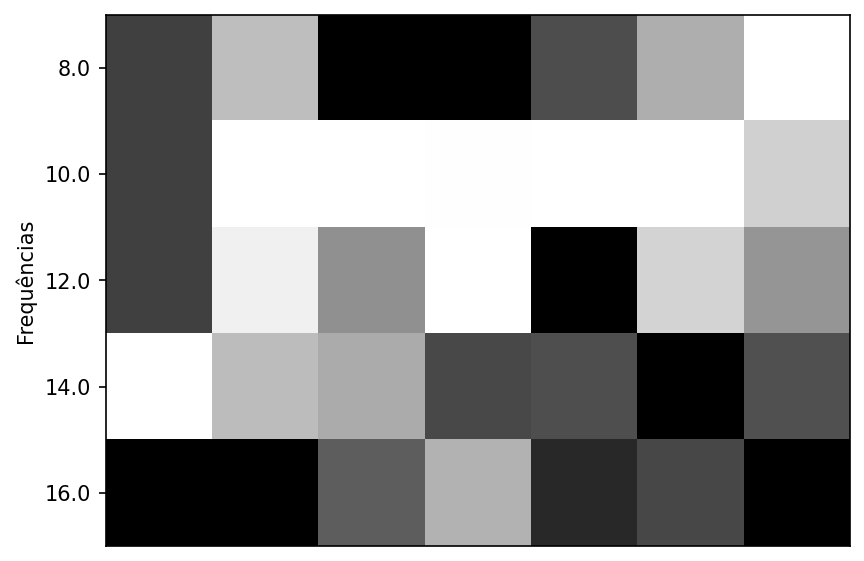

(1, 5, 7)

In [734]:
spec, fr = create_spectrogram(test_signal, 0.5, 0.25, 250, 7, 16)
for channel in spec:
    show_spec(channel, fr)
spec.shape

In [602]:
spec.shape

(3, 20, 3)

## Criação dos datasets

In [763]:
channels = [
    47,
    53,
    54,
    55,
    56,
    57,
    60,
    61,
    62,
]  #  Pz, PO5, PO3, POz, PO4, PO6, O1, Oz, O2

In [764]:
freq_selecionadas

array([ 8, 10, 12, 15])

In [765]:
windows.shape

(64, 250, 40, 6, 5)

In [760]:
# Gera os datasets
# ALterar parametros na função create_spectrogram e nomes dos arquivos
spectrograms = []
labels = []
for trial in range(0, 6):
    labels_trial = []
    specs_trial = []
    for idx, freq in enumerate(freq_selecionadas):
        for window in range(0, 5):
            signal = windows[
                channels, :, np.where(frequencias == freq)[1], trial, window
            ]
            spec, freqs_spec = create_spectrogram(signal, 0.5, 0.25, 250, 7, 16)
            specs_trial.append(spec)
            labels_trial.append(idx)
    labels.append(labels_trial)
    spectrograms.append(specs_trial)


spectrograms = np.array(spectrograms)
labels = np.array(labels)
print(spectrograms.shape)
print(labels.shape)
np.save("labels_numeric.npy", labels)
# np.save("labels_janela05s_hop02s_9_channels.npy", labels)
np.save("spectrograms_janela05s_hop025s_9_small.npy", spectrograms)

(6, 20, 9, 5, 7)
(6, 20)


In [761]:
spectrograms[1].shape

(20, 9, 5, 7)

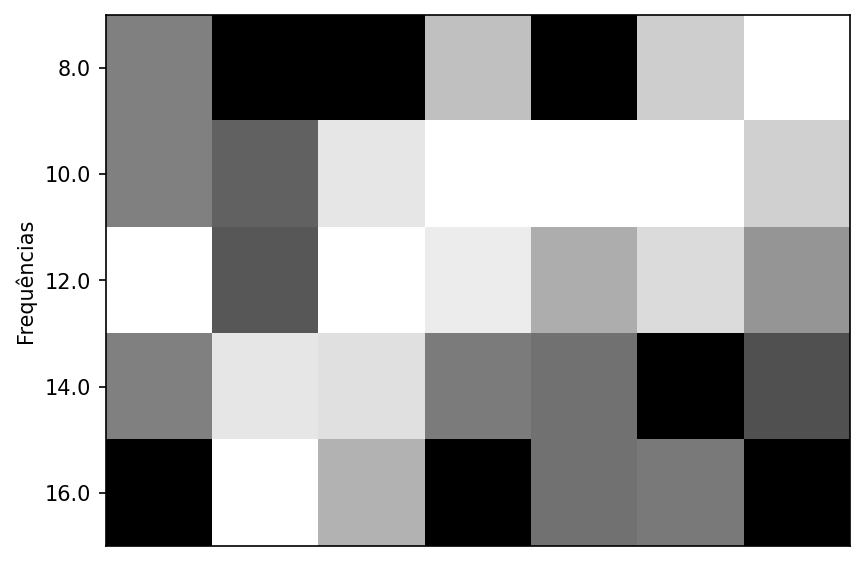

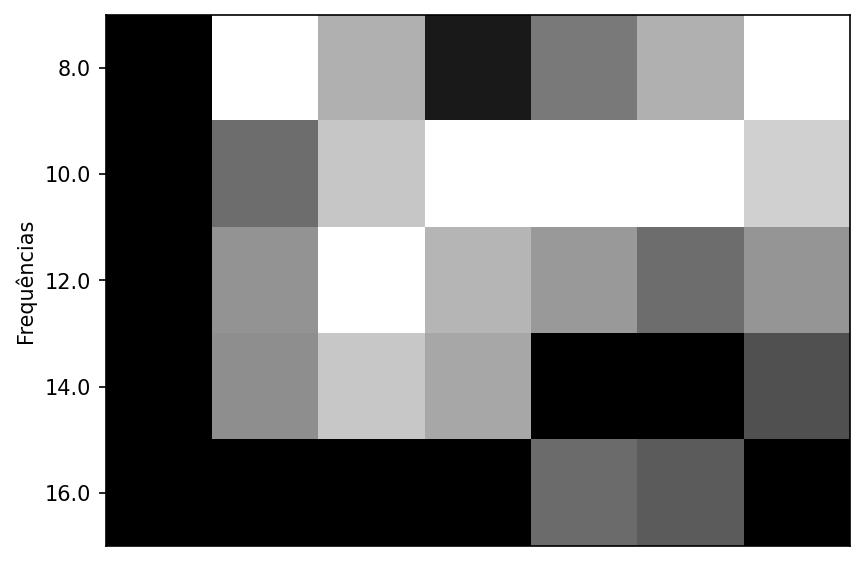

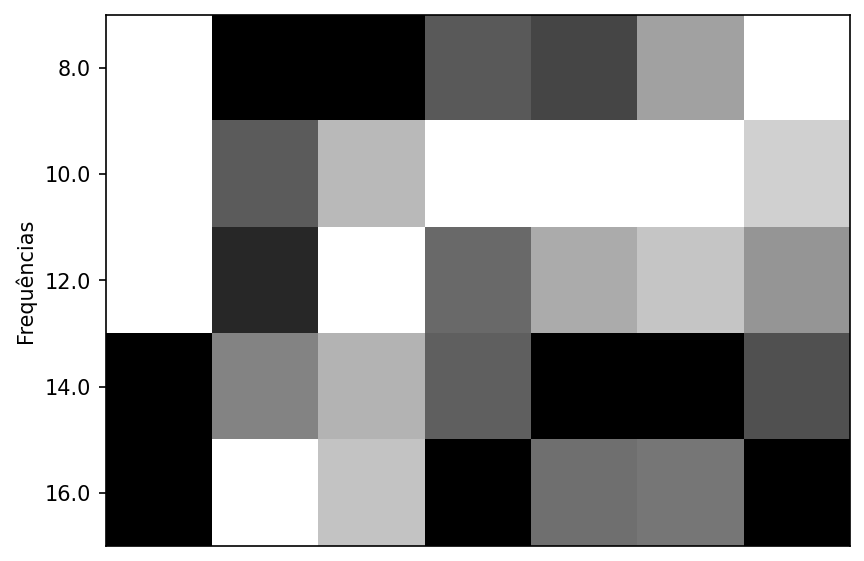

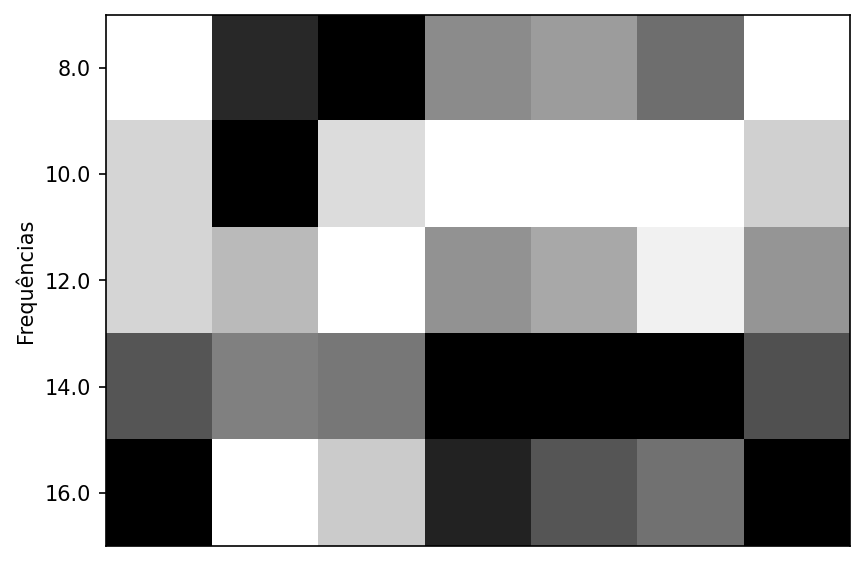

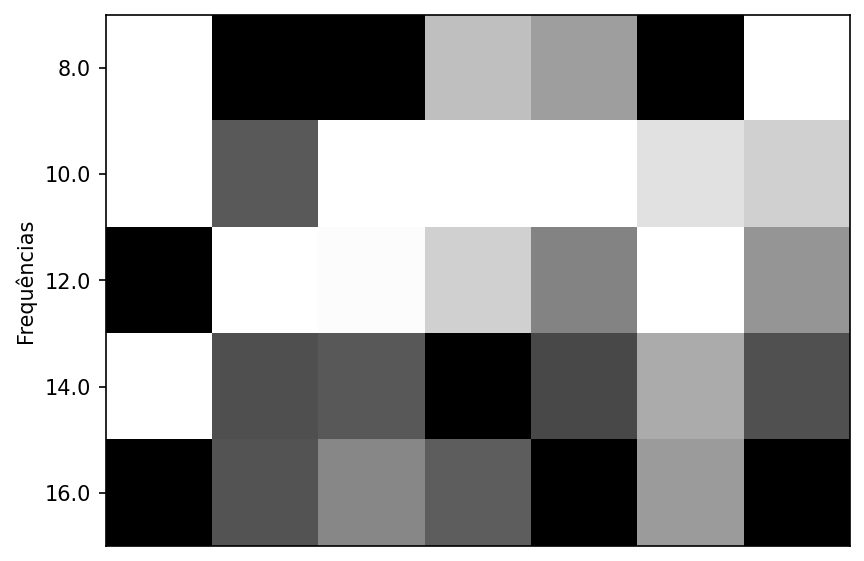

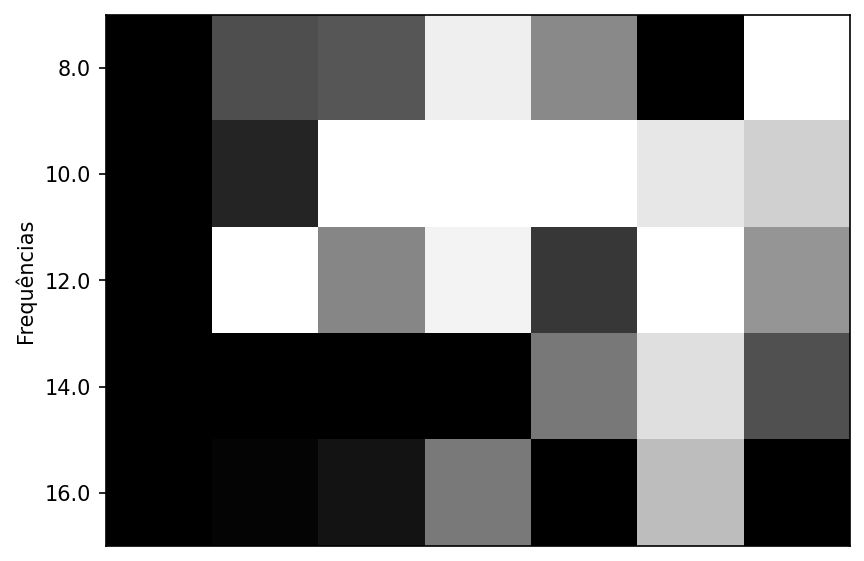

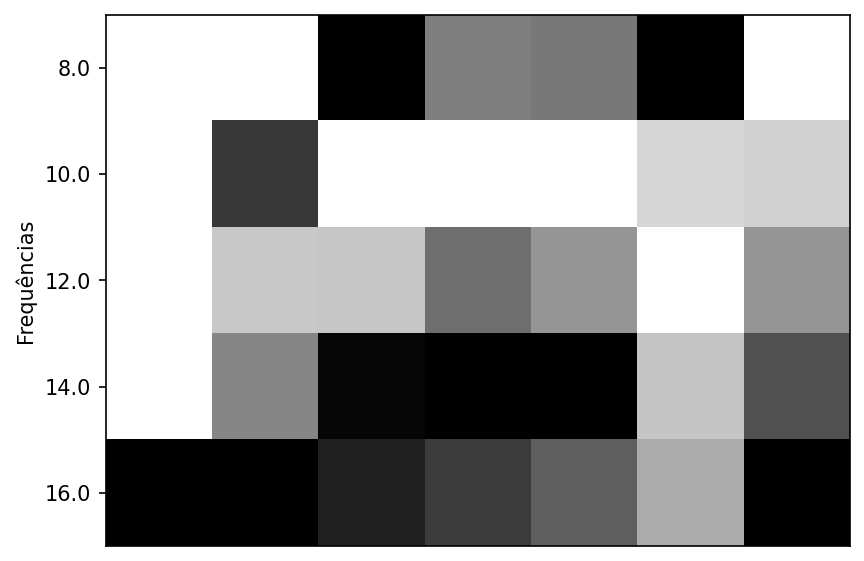

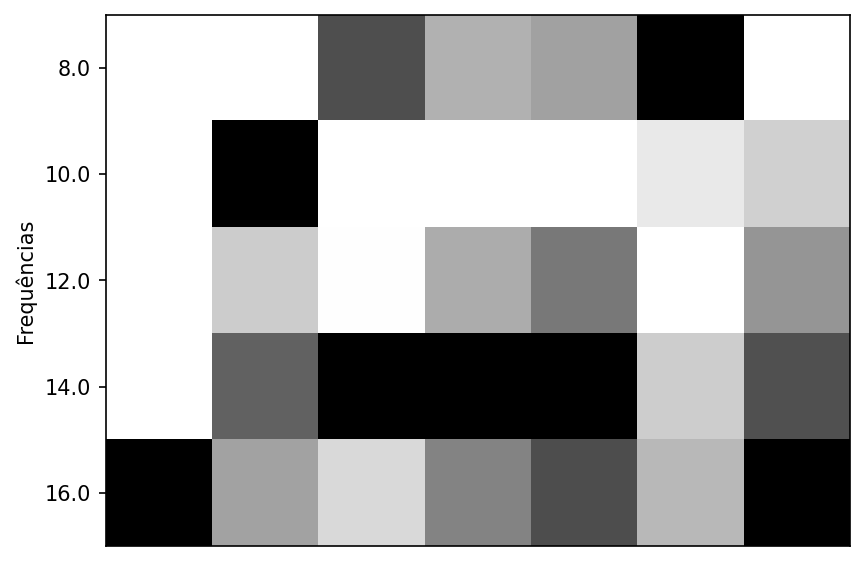

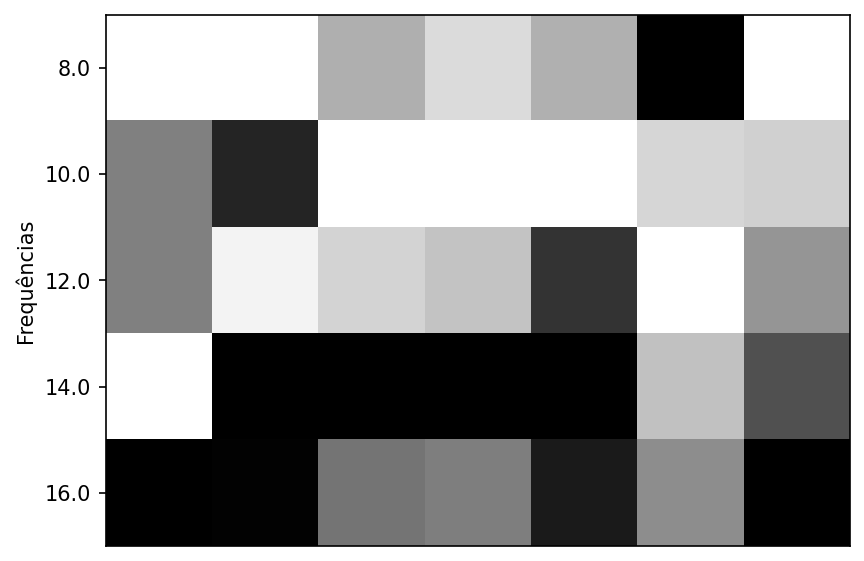

In [762]:
for channel in spectrograms[0][1]:
    show_spec(channel, freqs_spec)

array([1., 0., 0., 0.])